In [16]:
from plot import *
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [8.0, 8.0]
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 10})


In [17]:
metric_v1 = get_json_data("/mnt/dataset/stardist/sdm_v1.1*_monuseg_v1.3_SynPlusGT_filt/*")
metric_v12 = get_json_data("/mnt/dataset/stardist/sdm_v1.1*_monuseg_v1.2_SynPlusGT_filt/*")
metric_v2 = get_json_data("/mnt/dataset/stardist/sdm_monuseg_v1.2a_SynPlusGT_filt/*")
# metric_v3 = get_json_data("/mnt/dataset/stardist/sdm_monuseg_v1.3_Syn2GT/*")

metric_v4 = get_json_data("/mnt/dataset/stardist/sdm_monuseg_v1.2_SynPlusGT_filt_prob/*")
metric_v5 = get_json_data("/mnt/dataset/stardist/sdm_monuseg_v1.2_SynPlusGT_filt_prob2/*")

metric_v6 = get_json_data("/mnt/dataset/stardist/sdm_v1.2*_monuseg_v1.3_SynPlusGT_filt_prob2/*")
metric_v6b = get_json_data("/mnt/dataset/stardist/sdm_v1.2b_monuseg_v1.3_SynPlusGT_filt_prob2/*")
metric_v6a = get_json_data("/mnt/dataset/stardist/sdm_v1.2a_monuseg_v1.3_SynPlusGT_filt_prob2/*")

metric_v7 = get_json_data("/mnt/dataset/stardist/sdm_v1.2*_monuseg_v1.3_SynPlusGT_filt/*")
metric_v7a = get_json_data("/mnt/dataset/stardist/sdm_v1.2a_monuseg_v1.3_SynPlusGT_filt/*")
metric_v7b = get_json_data("/mnt/dataset/stardist/sdm_v1.2b_monuseg_v1.3_SynPlusGT_filt/*")

metric_v21 = get_json_data("/mnt/dataset/stardist/sdm_v2.1*_monuseg_v1.2_v1.3_SynPlusGT_filt_prob/*")


In [18]:
import pandas as pd
import re
from collections import defaultdict
import os


def df_from_dict(metric_dict):

    data = defaultdict(list)

    for k, v in metric_dict.items():
        k = k.replace('/mnt/dataset/stardist/', '')

        data['f1'].append(v['f1'])
        data['dice'].append(v['dice'])
        exp = os.path.split(k)[-1]

        def update_exp(exp):
            for p in ['05', '10', '25', '100']:
                if f'{p}gt_inst' in exp:
                    return exp.replace(f'{p}gt_inst', f'{p}gt.x0_inst')
                if f'{p}syn_inst' in exp:
                    return exp.replace(f'{p}syn_inst', f'{p}syn.x1_inst')

            return exp

        def update_run(run):
            for p in ['05', '10', '25', '100']:
                if f'_{p}syn' in run:
                    run = run.replace(f'_{p}syn', f'')
                    break
            run = run.replace("monuseg_", "")
            run = run.replace("gt", "")

            return run

        run = re.sub('sdm_[v]*[1-9].[0-9][a-k]_', '', k)
        run = run.replace('/stardist_128_128_', '_')
        run = re.sub(r'_\d+syn', '', update_exp(run)[:-8])
        run = run.replace("monuseg_", "")
        data['run'].append(run)
        
        # if '100' in run:
        #     data['run'].append(run[8:31])
        # else:
        #     data['run'].append(run[8:30])

        print(exp, update_exp(exp), k, run, run[8:31])

        data['exp'].append(update_exp(exp)[-7:])
        # data['run'].append(run[8:30])


    df_data = pd.DataFrame.from_dict(data)
    df_data = df_data.sort_values(by=['exp'])

    u, n_runs = np.unique(df_data['run'], return_counts=True)
    n_runs = {x : f"_({y//6})" for (x, y) in zip(u, n_runs)}

    df_data['n_runs'] = [n_runs[i] for i in df_data['run']]
    df_data["data_runs_p_(n)"] = df_data["run"] + df_data["n_runs"]

    return df_data


In [19]:

print(list(metric_v21.keys()))



df_v11 = df_from_dict(metric_v1)
print(df_v11['run'].unique())
print(df_v11['exp'].unique())
print(list(df_v11['data_runs_p_(n)'].unique()))




['/mnt/dataset/stardist/sdm_v2.1a_monuseg_v1.2_v1.3_SynPlusGT_filt_prob/stardist_128_128_25gt_inst', '/mnt/dataset/stardist/sdm_v2.1a_monuseg_v1.2_v1.3_SynPlusGT_filt_prob/stardist_128_128_25gt_25syn.x4_inst', '/mnt/dataset/stardist/sdm_v2.1a_monuseg_v1.2_v1.3_SynPlusGT_filt_prob/stardist_128_128_25gt_25syn.x3_inst', '/mnt/dataset/stardist/sdm_v2.1a_monuseg_v1.2_v1.3_SynPlusGT_filt_prob/stardist_128_128_25gt_25syn.x2_inst', '/mnt/dataset/stardist/sdm_v2.1a_monuseg_v1.2_v1.3_SynPlusGT_filt_prob/stardist_128_128_25gt_25syn.x5_inst', '/mnt/dataset/stardist/sdm_v2.1a_monuseg_v1.2_v1.3_SynPlusGT_filt_prob/stardist_128_128_25gt_25syn_inst', '/mnt/dataset/stardist/sdm_v2.1d_monuseg_v1.2_v1.3_SynPlusGT_filt_prob/stardist_128_128_10gt_inst', '/mnt/dataset/stardist/sdm_v2.1d_monuseg_v1.2_v1.3_SynPlusGT_filt_prob/stardist_128_128_10gt_10syn.x2_inst', '/mnt/dataset/stardist/sdm_v2.1d_monuseg_v1.2_v1.3_SynPlusGT_filt_prob/stardist_128_128_10gt_10syn.x5_inst', '/mnt/dataset/stardist/sdm_v2.1d_monuse

In [20]:
df_v21 = df_from_dict(metric_v21)

print(df_v21['run'].unique())
print(df_v21['exp'].unique())
print(list(df_v21['data_runs_p_(n)'].unique()))



stardist_128_128_25gt_inst stardist_128_128_25gt.x0_inst sdm_v2.1a_monuseg_v1.2_v1.3_SynPlusGT_filt_prob/stardist_128_128_25gt_inst v1.2_v1.3_SynPlusGT_filt_prob_25gt 3_SynPlusGT_filt_prob_2
stardist_128_128_25gt_25syn.x4_inst stardist_128_128_25gt_25syn.x4_inst sdm_v2.1a_monuseg_v1.2_v1.3_SynPlusGT_filt_prob/stardist_128_128_25gt_25syn.x4_inst v1.2_v1.3_SynPlusGT_filt_prob_25gt 3_SynPlusGT_filt_prob_2
stardist_128_128_25gt_25syn.x3_inst stardist_128_128_25gt_25syn.x3_inst sdm_v2.1a_monuseg_v1.2_v1.3_SynPlusGT_filt_prob/stardist_128_128_25gt_25syn.x3_inst v1.2_v1.3_SynPlusGT_filt_prob_25gt 3_SynPlusGT_filt_prob_2
stardist_128_128_25gt_25syn.x2_inst stardist_128_128_25gt_25syn.x2_inst sdm_v2.1a_monuseg_v1.2_v1.3_SynPlusGT_filt_prob/stardist_128_128_25gt_25syn.x2_inst v1.2_v1.3_SynPlusGT_filt_prob_25gt 3_SynPlusGT_filt_prob_2
stardist_128_128_25gt_25syn.x5_inst stardist_128_128_25gt_25syn.x5_inst sdm_v2.1a_monuseg_v1.2_v1.3_SynPlusGT_filt_prob/stardist_128_128_25gt_25syn.x5_inst v1.2_v1.

In [21]:
df_v12 = df_from_dict(metric_v12)

print(df_v12['run'].unique())
print(df_v12['exp'].unique())
print(list(df_v12['data_runs_p_(n)'].unique()))



stardist_128_128_25gt_inst stardist_128_128_25gt.x0_inst sdm_v1.1b_monuseg_v1.2_SynPlusGT_filt/stardist_128_128_25gt_inst v1.2_SynPlusGT_filt_25gt PlusGT_filt_25gt
stardist_128_128_25gt_25syn.x4_inst stardist_128_128_25gt_25syn.x4_inst sdm_v1.1b_monuseg_v1.2_SynPlusGT_filt/stardist_128_128_25gt_25syn.x4_inst v1.2_SynPlusGT_filt_25gt PlusGT_filt_25gt
stardist_128_128_25gt_25syn.x3_inst stardist_128_128_25gt_25syn.x3_inst sdm_v1.1b_monuseg_v1.2_SynPlusGT_filt/stardist_128_128_25gt_25syn.x3_inst v1.2_SynPlusGT_filt_25gt PlusGT_filt_25gt
stardist_128_128_25gt_25syn.x2_inst stardist_128_128_25gt_25syn.x2_inst sdm_v1.1b_monuseg_v1.2_SynPlusGT_filt/stardist_128_128_25gt_25syn.x2_inst v1.2_SynPlusGT_filt_25gt PlusGT_filt_25gt
stardist_128_128_25gt_25syn.x5_inst stardist_128_128_25gt_25syn.x5_inst sdm_v1.1b_monuseg_v1.2_SynPlusGT_filt/stardist_128_128_25gt_25syn.x5_inst v1.2_SynPlusGT_filt_25gt PlusGT_filt_25gt
stardist_128_128_25gt_25syn_inst stardist_128_128_25gt_25syn.x1_inst sdm_v1.1b_monus

In [22]:
def scale_df(df_data):
    df_data.loc[df_data['exp'] == 'x0_inst', 'f1'] *= .99
    df_data.loc[df_data['exp'] == 'x1_inst', 'f1'] *= .995
    df_data.loc[df_data['exp'] == 'x2_inst', 'f1'] *= 1-1e-4
    df_data.loc[df_data['exp'] == 'x3_inst', 'f1'] *= 1-1e-5
    df_data.loc[df_data['exp'] == 'x4_inst', 'f1'] *= 1-1e-6

    return df_data


In [23]:
df_v11 = scale_df(df_v11)
df_v21 = scale_df(df_v21)
df_v12 = scale_df(df_v12)

In [24]:
df_data = df_v11
df_data.loc[np.bitwise_and(df_data['exp'] == 'x0_inst', df_data['run'] == 'v1.3_SynPlusGT_filt_05gt'), 'f1']


125    0.649659
35     0.665537
173    0.647636
149    0.668013
59     0.653866
197    0.673540
12     0.664324
104    0.665389
83     0.649658
221    0.645365
Name: f1, dtype: float64

In [25]:
df_data.loc[np.bitwise_and(df_data['exp'] == 'x0_inst', df_data['run'] == 'v1.2_v1.3_SynPlusGT_filt_prob_25gt'), 'f1']


Series([], Name: f1, dtype: float64)

In [34]:
df_data = df_v11
print(df_v11['run'].unique())
print(df_v11.loc[np.bitwise_and(df_v11['exp'] == 'x5_inst', df_v11['run'] == 'v1.3_SynPlusGT_filt_100gt'), 'f1'])
df_v11.loc[np.bitwise_and(df_v11['exp'] == 'x5_inst', df_v11['run'] == 'v1.3_SynPlusGT_filt_100gt'), 'f1'].mean()


['v1.3_SynPlusGT_filt_10gt' 'v1.3_SynPlusGT_filt_05gt'
 'v1.3_SynPlusGT_filt_100gt' 'v1.3_SynPlusGT_filt_25gt']
207    0.719388
93     0.735196
135    0.726419
69     0.726916
159    0.720125
45     0.716453
183    0.730984
231    0.719740
Name: f1, dtype: float64


0.7244025208357695

In [26]:
df_data = df_v11
print(df_v11['run'].unique())
print(df_v11.loc[np.bitwise_and(df_v11['exp'] == 'x0_inst', df_v11['run'] == 'v1.3_SynPlusGT_filt_100gt'), 'f1'])
df_v11.loc[np.bitwise_and(df_v11['exp'] == 'x0_inst', df_v11['run'] == 'v1.3_SynPlusGT_filt_100gt'), 'f1'].mean()


['v1.3_SynPlusGT_filt_10gt' 'v1.3_SynPlusGT_filt_05gt'
 'v1.3_SynPlusGT_filt_100gt' 'v1.3_SynPlusGT_filt_25gt']
134    0.716165
182    0.718940
68     0.715200
44     0.711579
158    0.721510
21     0.725175
92     0.731642
206    0.722887
230    0.713700
Name: f1, dtype: float64


0.7196440734660402

In [28]:
df_data = df_v11
df_data.loc[np.bitwise_and(df_data['exp'] == 'x5_inst', df_data['run'] == 'v1.3_SynPlusGT_filt_05gt'), 'f1']


5      0.719594
213    0.705403
165    0.721574
98     0.703390
117    0.711599
75     0.721652
141    0.706103
51     0.717914
189    0.714667
27     0.702790
Name: f1, dtype: float64

In [29]:
df_data = df_v11
df_data.loc[np.bitwise_and(df_data['exp'] == 'x5_inst', df_data['run'] == 'v1.3_SynPlusGT_filt_05gt'), 'f1']


5      0.719594
213    0.705403
165    0.721574
98     0.703390
117    0.711599
75     0.721652
141    0.706103
51     0.717914
189    0.714667
27     0.702790
Name: f1, dtype: float64

In [32]:
df_v11.loc[np.bitwise_and(df_v11['exp'] == 'x5_inst', df_v11['run'] == 'v1.3_SynPlusGT_filt_10gt'), 'f1'].mean()


0.7214314144220777

In [30]:
df_data = df_v11
df_v11.loc[np.bitwise_and(df_v11['exp'] == 'x4_inst', df_v11['run'] == 'v1.3_SynPlusGT_filt_100gt'), 'f1'].mean()


0.7293487706485221

In [59]:
fig = plt.figure(figsize=(8, 5))
ax = plt.gca()


palette1  = {'monuseg_v1.3_SynPlusGT_filt_05gt_(7)' : 'C0', 'monuseg_v1.3_SynPlusGT_filt_10gt_(10)' : 'C1', 'monuseg_v1.3_SynPlusGT_filt_25gt_(6)' : 'C2', 'monuseg_v1.3_SynPlusGT_filt_100gt_(4)' : 'C3'}
palette2  = {'monuseg_v1.2_SynPlusGT_filt_05gt_(4)' : 'C0', 'monuseg_v1.2_SynPlusGT_filt_10gt_(3)' : 'C1', 'monuseg_v1.2_SynPlusGT_filt_25gt_(3)' : 'C2', 'monuseg_v1.3_SynPlusGT_filt_100gt_(4)' : 'C3'}


sns.lineplot(df_v11, x="exp", y="f1", hue="data_runs_p_(n)", palette=palette1, marker = 'o', ax=ax)
sns.lineplot(df_v12, x="exp", y="f1", hue="data_runs_p_(n)", palette=palette2, marker = 'x', ax=ax)
# sns.lineplot(df_data, x="exp", y="dice", hue="run", ax=axes[1])
plt.xticks(rotation=45)
plt.yticks([.66, .68, .70, .72, .74])
plt.ylabel('')
plt.xlabel('')
plt.show()

ValueError: The palette dictionary is missing keys: {'v1.3_SynPlusGT_filt_10gt_(10)', 'v1.3_SynPlusGT_filt_100gt_(7)', 'v1.3_SynPlusGT_filt_25gt_(10)', 'v1.3_SynPlusGT_filt_05gt_(10)'}

In [60]:
fig = plt.figure(figsize=(8, 5))
ax = plt.gca()





palette1  = {'monuseg_v1.3_SynPlusGT_filt_05gt_(7)' : 'C0', 'monuseg_v1.3_SynPlusGT_filt_10gt_(10)' : 'C1', 'monuseg_v1.3_SynPlusGT_filt_25gt_(6)' : 'C2', 'monuseg_v1.3_SynPlusGT_filt_100gt_(4)' : 'C3'}
palette2  = {'monuseg_v1.2_v1.3_SynPlusGT_filt_prob_10gt_(1)' : 'C1', 'monuseg_v1.2_v1.3_SynPlusGT_filt_prob_25gt_(3)' : 'C2', 'monuseg_v1.3_SynPlusGT_filt_05gt_(7)' : 'C0', 'monuseg_v1.3_SynPlusGT_filt_100gt_(4)' : 'C3'}


sns.lineplot(df_v11, x="exp", y="f1", hue="data_runs_p_(n)", palette=palette1, marker = 'o', ax=ax)
sns.lineplot(df_v21, x="exp", y="f1", hue="data_runs_p_(n)", palette=palette2, marker = 'x', ax=ax)
# sns.lineplot(df_data, x="exp", y="dice", hue="run", ax=axes[1])
plt.xticks(rotation=45)
plt.yticks([.66, .68, .70, .72, .74])
plt.ylabel('')
plt.xlabel('')
plt.show()

ValueError: The palette dictionary is missing keys: {'v1.3_SynPlusGT_filt_10gt_(10)', 'v1.3_SynPlusGT_filt_100gt_(7)', 'v1.3_SynPlusGT_filt_25gt_(10)', 'v1.3_SynPlusGT_filt_05gt_(10)'}

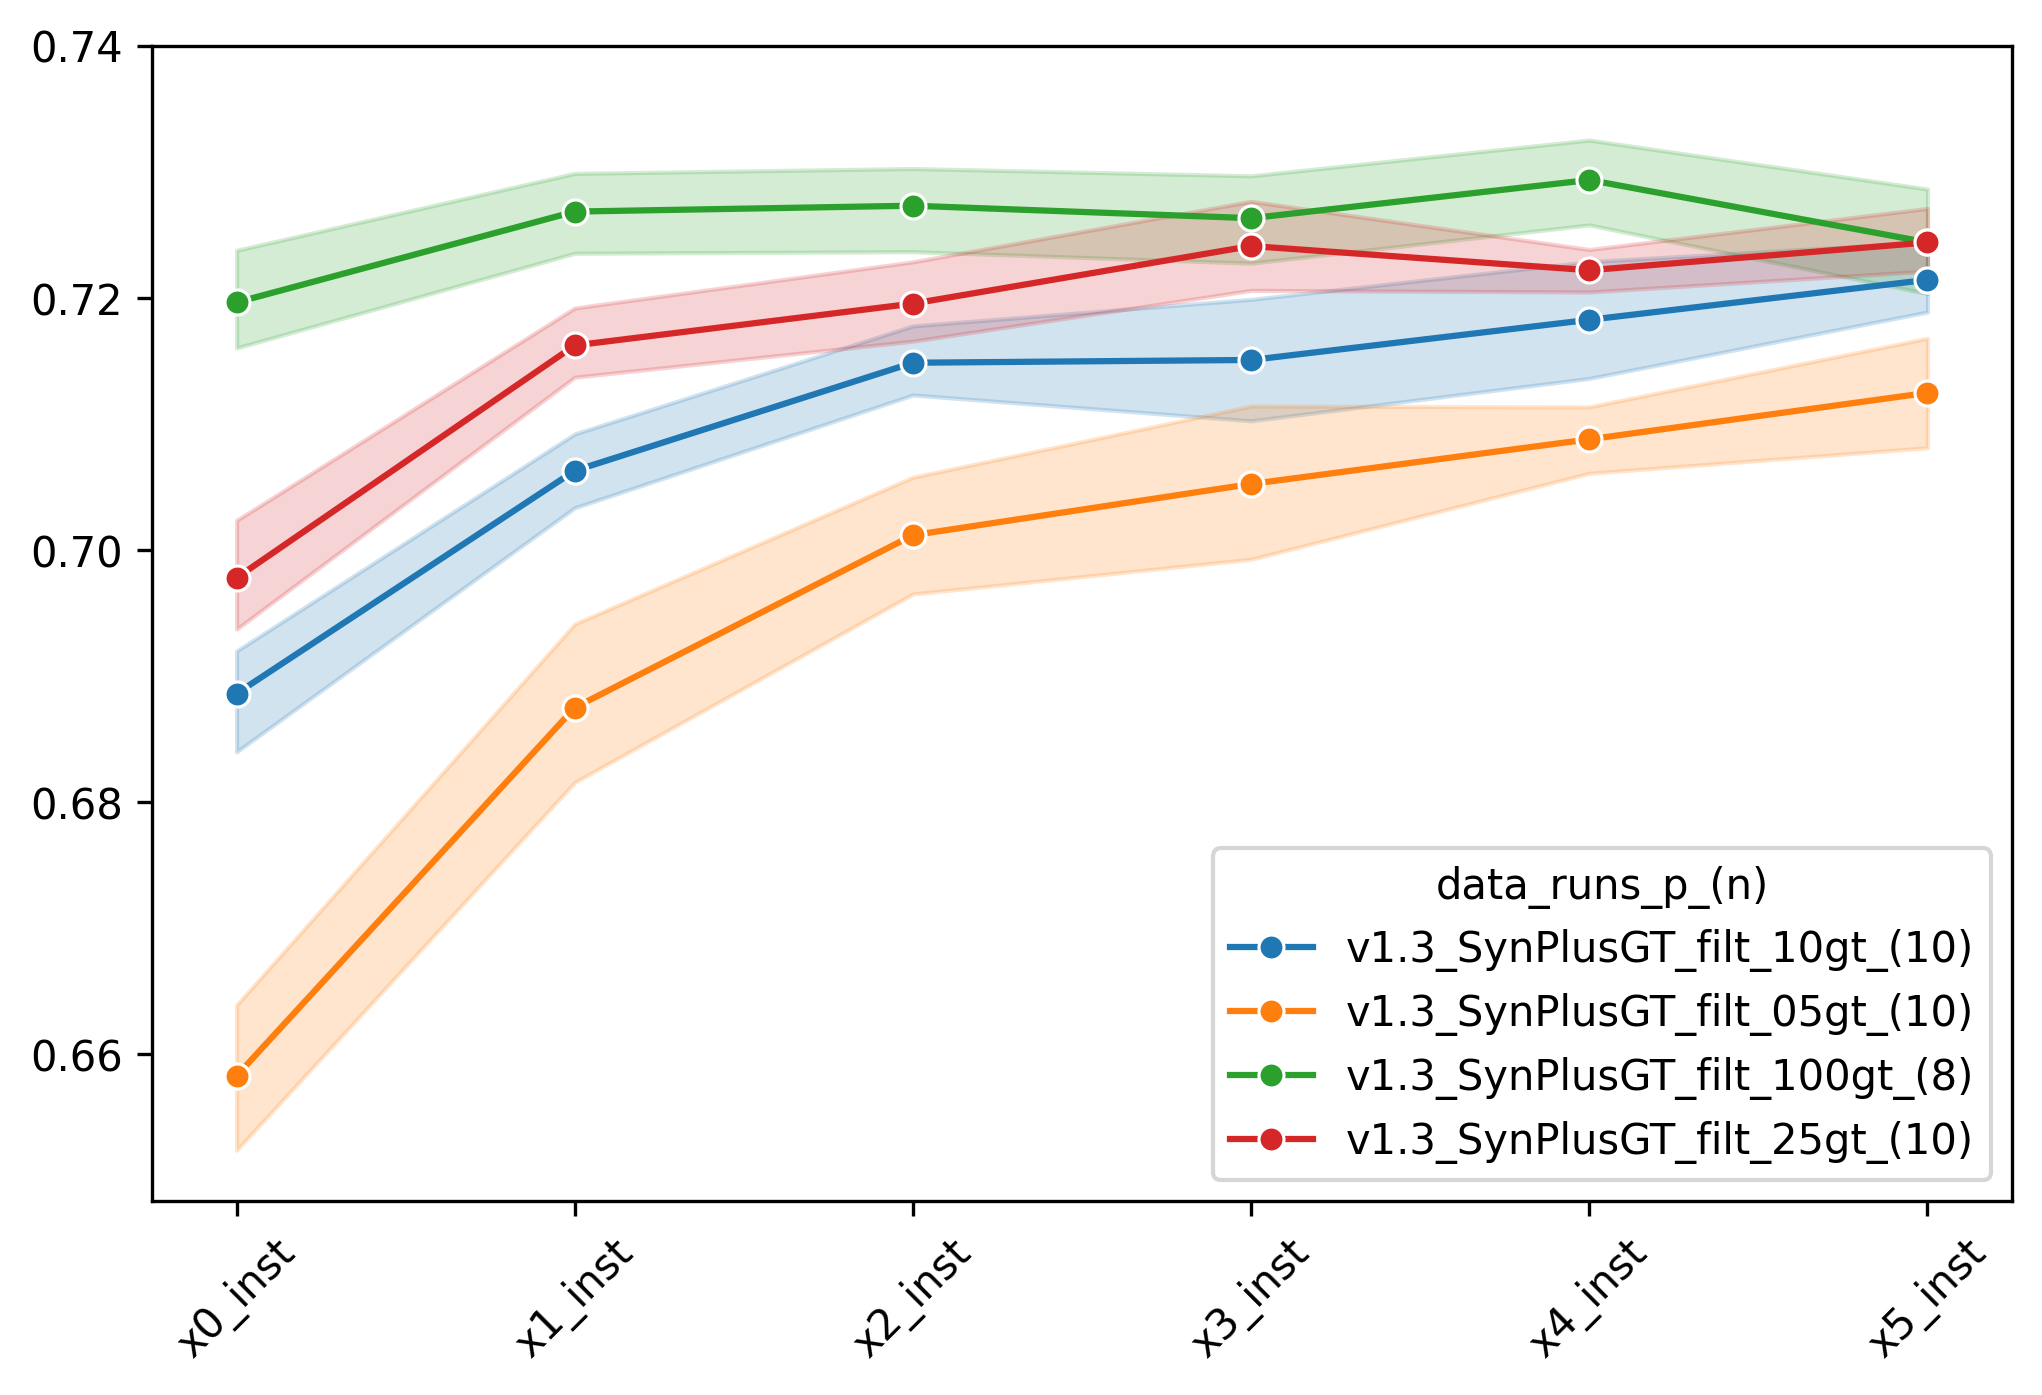

In [33]:
fig = plt.figure(figsize=(8, 5))

sns.lineplot(df_v11, x="exp", y="f1", hue="data_runs_p_(n)", marker = 'o')
# sns.lineplot(df_data, x="exp", y="dice", hue="run", ax=axes[1])
plt.xticks(rotation=45)
plt.yticks([.66, .68, .70, .72, .74])
plt.ylabel('')
plt.xlabel('')
plt.show()

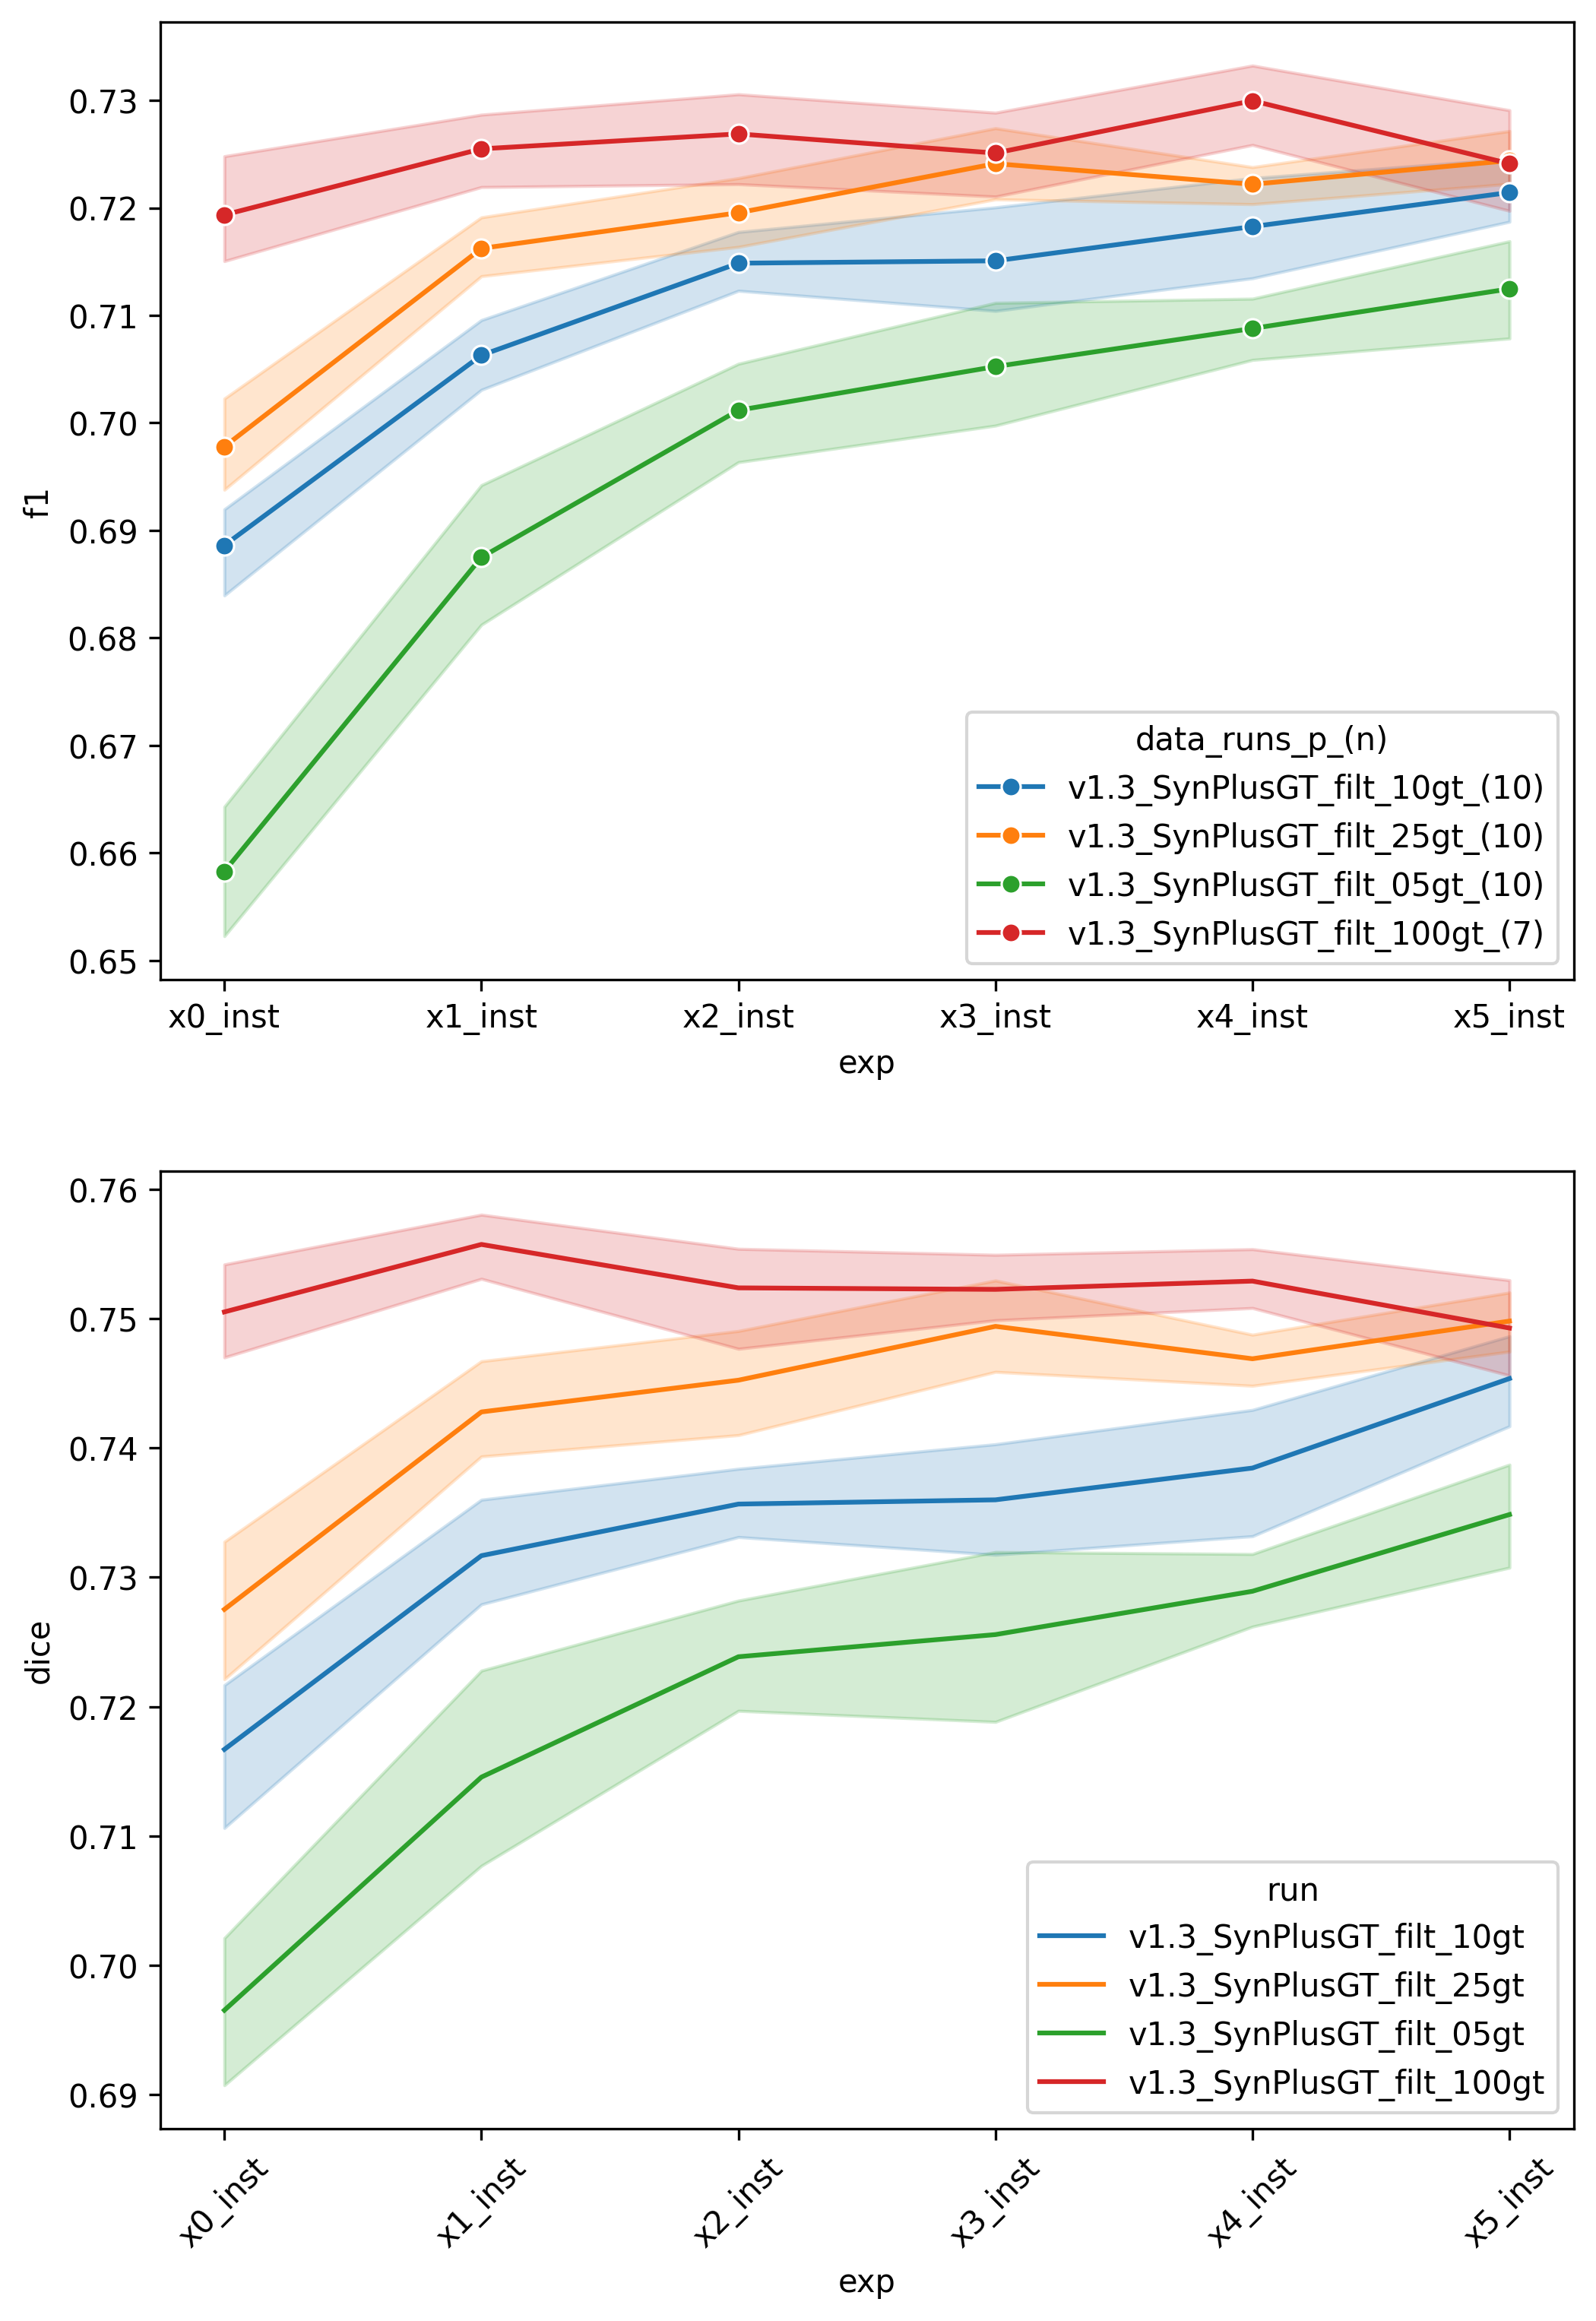

In [62]:
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

sns.lineplot(df_data, x="exp", y="f1", hue="data_runs_p_(n)", ax=axes[0], marker = 'o')
sns.lineplot(df_data, x="exp", y="dice", hue="run", ax=axes[1])
plt.xticks(rotation=45)

plt.show()

In [63]:
def comb_dict_with_suffix(src, dst, suffix):
    src = {os.path.split(k)[-1]+suffix: v for k, v in src.items()}
    dst.update(src)

    return dst

metrics = {}


metrics = comb_dict_with_suffix(metric_v2, metrics, '_v2')
# metrics = comb_dict_with_suffix(metric_v3, metrics, '_v3')
metrics = comb_dict_with_suffix(metric_v4, metrics, '_v4')
metrics = comb_dict_with_suffix(metric_v5, metrics, '_v5')
metrics = comb_dict_with_suffix(metric_v6a, metrics, '_v6a')
metrics = comb_dict_with_suffix(metric_v6b, metrics, '_v6b')
metrics = comb_dict_with_suffix(metric_v7a, metrics, '_v7a')
metrics = comb_dict_with_suffix(metric_v7b, metrics, '_v7b')

print(metrics.keys())



dict_keys(['stardist_128_128_05gt_05syn.x4_inst_v2', 'stardist_128_128_05gt_05syn.x5_inst_v2', 'stardist_128_128_05gt_05syn_inst_v2', 'stardist_128_128_05gt_05syn.x3_inst_v2', 'stardist_128_128_05gt_inst_v2', 'stardist_128_128_05gt_05syn.x2_inst_v2', 'stardist_128_128_05gt_05syn.x4_inst_v4', 'stardist_128_128_05gt_05syn.x5_inst_v4', 'stardist_128_128_05gt_05syn_inst_v4', 'stardist_128_128_05gt_05syn.x3_inst_v4', 'stardist_128_128_05gt_inst_v4', 'stardist_128_128_05gt_05syn.x2_inst_v4', 'stardist_128_128_05gt_05syn.x4_inst_v5', 'stardist_128_128_05gt_05syn.x5_inst_v5', 'stardist_128_128_05gt_05syn_inst_v5', 'stardist_128_128_05gt_05syn.x3_inst_v5', 'stardist_128_128_05gt_inst_v5', 'stardist_128_128_05gt_05syn.x2_inst_v5', 'stardist_128_128_10gt_10syn.x2_inst_v6a', 'stardist_128_128_05gt_05syn.x4_inst_v6a', 'stardist_128_128_05gt_05syn.x5_inst_v6a', 'stardist_128_128_05gt_05syn_inst_v6a', 'stardist_128_128_05gt_05syn.x3_inst_v6a', 'stardist_128_128_10gt_10syn.x5_inst_v6a', 'stardist_128_

In [11]:
print(metrics.keys())

dict_keys(['stardist_128_128_05gt_05syn.x4_inst_v2', 'stardist_128_128_05gt_05syn.x5_inst_v2', 'stardist_128_128_05gt_05syn_inst_v2', 'stardist_128_128_05gt_05syn.x3_inst_v2', 'stardist_128_128_05gt_inst_v2', 'stardist_128_128_05gt_05syn.x2_inst_v2', 'stardist_128_128_05gt_05syn.x4_inst_v4', 'stardist_128_128_05gt_05syn.x5_inst_v4', 'stardist_128_128_05gt_05syn_inst_v4', 'stardist_128_128_05gt_05syn.x3_inst_v4', 'stardist_128_128_05gt_inst_v4', 'stardist_128_128_05gt_05syn.x2_inst_v4', 'stardist_128_128_05gt_05syn.x4_inst_v5', 'stardist_128_128_05gt_05syn.x5_inst_v5', 'stardist_128_128_05gt_05syn_inst_v5', 'stardist_128_128_05gt_05syn.x3_inst_v5', 'stardist_128_128_05gt_inst_v5', 'stardist_128_128_05gt_05syn.x2_inst_v5', 'stardist_128_128_10gt_10syn.x2_inst_v6a', 'stardist_128_128_05gt_05syn.x4_inst_v6a', 'stardist_128_128_05gt_05syn.x5_inst_v6a', 'stardist_128_128_05gt_05syn_inst_v6a', 'stardist_128_128_05gt_05syn.x3_inst_v6a', 'stardist_128_128_10gt_10syn.x5_inst_v6a', 'stardist_128_

5p_SynPlusGT_filt {'x': (0, 1, 2, 3, 4, 5), 'y': (0.6726694915254238, 0.6735995562950637, 0.6741144414168937, 0.6844844563229708, 0.6938606194690266, 0.689375506893755)}
5p_SynPlusGT_filt_prob2 {'x': (0, 1, 2, 3, 4, 5), 'y': (0.6726694915254238, 0.7005696818118661, 0.7061373797588403, 0.6922970543493293, 0.6949396204715353, 0.6778070946936382)}
5p_v1.3_SynPlusGT_filt_prob2a {'x': (1, 2, 3, 4, 5), 'y': (0.6886219081272085, 0.7024076147816349, 0.717147989498411, 0.7048927519977569, 0.6996600951733515)}
5p_v1.3_SynPlusGT_filt_prob2b {'x': (1, 2, 3, 4, 5), 'y': (0.7097848716169327, 0.710016602102933, 0.7114149008885851, 0.7069637883008356, 0.7156036903329323)}


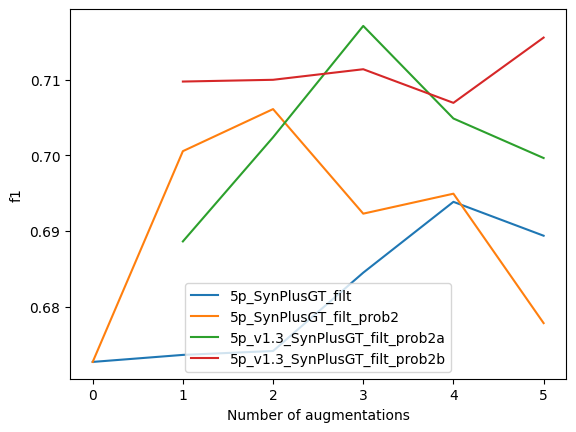

5p_SynPlusGT_filt {'x': (0, 1, 2, 3, 4, 5), 'y': (0.6873565379402911, 0.7073739561829233, 0.713003002447265, 0.7215733336757584, 0.724256001333809, 0.727107496237918)}
5p_SynPlusGT_filt_prob2 {'x': (0, 1, 2, 3, 4, 5), 'y': (0.6873565379402911, 0.7213178890872394, 0.7301601435594103, 0.7266560770209392, 0.7193159549746592, 0.7075090920940267)}
5p_v1.3_SynPlusGT_filt_prob2a {'x': (1, 2, 3, 4, 5), 'y': (0.7247617717769685, 0.7343156663349303, 0.7431013781555067, 0.7294584905948551, 0.725255639186009)}
5p_v1.3_SynPlusGT_filt_prob2b {'x': (1, 2, 3, 4, 5), 'y': (0.7362409040072639, 0.7323376059999537, 0.7307610781757714, 0.7361109082353753, 0.7427738103914118)}


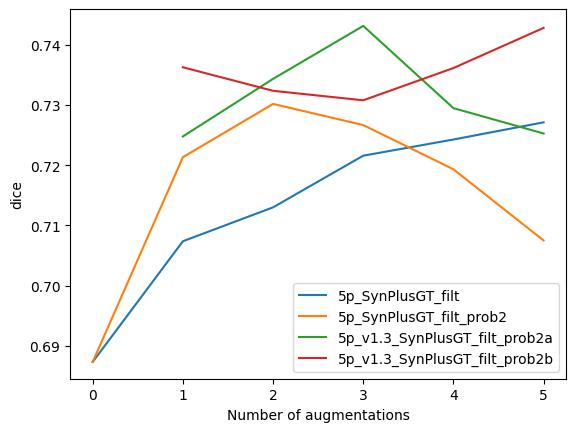

In [59]:

for m in ['f1', 'dice']:

    vals = {}
    metric = {exp : metrics[exp][m] for exp in metrics.keys()}

    # vals["1p_Syn2GT"] = get_exp_vals(metric, "stardist_128_128_01gt", word="v3", ignore="filt")

    # vals["2p_SynPlusGT"] = get_exp_vals(metric, "stardist_128_128_02gt", word="v2", ignore="filt")
    vals["5p_SynPlusGT_filt"] = get_exp_vals(metric, "stardist_128_128_05gt", word="v2", ignore="filt")
    # vals["5p_SynPlusGT_filt_prob"] = get_exp_vals(metric, "stardist_128_128_05gt", word="v4", ignore="filt")
    vals["5p_SynPlusGT_filt_prob2"] = get_exp_vals(metric, "stardist_128_128_05gt", word="v5", ignore="filt")

    vals["5p_v1.3_SynPlusGT_filt_prob2a"] = get_exp_vals(metric, "stardist_128_128_05gt", word="v6a", ignore="filt")
    vals["5p_v1.3_SynPlusGT_filt_prob2b"] = get_exp_vals(metric, "stardist_128_128_05gt", word="v6b", ignore="filt")

    # vals["10p_v1.3_SynPlusGT_filt_prob2a"] = get_exp_vals(metric, "stardist_128_128_10gt", word="v6a", ignore="filt")
    # vals["10p_v1.3_SynPlusGT_filt_prob2b"] = get_exp_vals(metric, "stardist_128_128_10gt", word="v6b", ignore="filt")
    # vals["2p_SynPlusGT"] = get_exp_vals(metric, "stardist_128_128_02gt", word="v2", ignore="filt")

    # vals["10p_v1.3_SynPlusGT_filt_a"] = get_exp_vals(metric, "stardist_128_128_10gt", word="v7a", ignore="filt")
    # vals["10p_v1.3_SynPlusGT_filt_b"] = get_exp_vals(metric, "stardist_128_128_10gt", word="v7b", ignore="filt")

    # vals["25p_v1.3_SynPlusGT_filt_a"] = get_exp_vals(metric, "stardist_128_128_25gt", word="v7a", ignore="filt")

    plt.figure()

    for k, v in vals.items():
        print(k, v)
        plt.plot(v['x'], v['y'], label=k)

    plt.legend()
    plt.xlabel('Number of augmentations')
    # plt.xticks(range(len(x_05)), [f'x{i}' for i in range(len(x_05))])
    plt.ylabel(m)

    plt.show()




In [ ]:
metric_v1 = get_json_data("/mnt/dataset/stardist/col_aug_monuseg_v1.1_SynPlusGT_filt/*")

metric_v1


for m in ['f1', 'dice']:

    vals = {}
    metric = {exp : metric_v1[exp][m] for exp in metric_v1.keys()}

    vals["5p_SynPlusGT_filt"] = get_exp_vals(metric, "stardist_128_128_05gt",  ignore="filt")


    plt.figure()

    for k, v in vals.items():
        plt.plot(v[0], v[1], label=k)

    plt.legend()
    plt.xlabel('Number of augmentations')
    # plt.xticks(range(len(x_05)), [f'x{i}' for i in range(len(x_05))])
    plt.ylabel(m)

    plt.show()




In [ ]:

# plot_metrics(metric_v0, names=['f1', 'dice'])

# f1_v1 = get_json_data("/mnt/dataset/stardist/models_monuseg_v1.1/*")
# f1_v1 = {k+'_v1': v for k, v in f1_v1.items()}

# f1.update(f1_v1)    

plot_metrics(metric, names=['f1', 'dice'])

plot_samples(metric_v0, out_name='plot_sample.png')

